<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
from numpy.linalg import eig
import cmath as cm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import *
import math as math
from scipy.optimize import curve_fit
import matplotlib.pylab as pylab
import matplotlib
import matplotlib.colors as colors
from matplotlib import cm

params = {'legend.fontsize': 15,
          'axes.labelsize': 20,
          'axes.labelpad' : 15,
          'axes.titlesize':20,
          'xtick.labelsize':20,
          'ytick.labelsize':20,
           'text.usetex': False,
           'font.family': 'stixgeneral',
           'mathtext.fontset': 'stix',
          
          }

In [14]:
def nghost_model(states):

    
    x1   = states[0]
    x2   = states[1] 
    
    
    dx[0] =  r*I - np.sin(kp*x1) 
    dx[1] =  -x2  
    
    return dx

def hvs(x,y):
    if x>y: 
        return 1
    else:
        return 0

def null(x1,x2,I):
    
    return x1*x1 + 0.25 + I, x2

def bb_model(states):
    
    dx = np.zeros(states.shape)
    
    x1   = states[0]
    x2   = states[1] 
    
    dx[0] = x2 - (a*x1*x1 + 0.25 + I) 
    dx[1] = x1 - x2
#     var1 = hvs(I)*x1
#     var2 = 
    return dx

def jac_ng(x1,x2):
    
        jacobian=np.array([[-kp*np.cos(kp*x1) ,0],
                 [0     ,-1]])

        return jacobian 
    
def jac_bb(x1,x2):
#         a=-0.4
        jacobian=np.array([[-2*x1 ,1],
                 [1     ,-1]])

        return jacobian 

def q(states,diff): 
    
    count=0
    dx    = diff(states)
    
    for i in range(len(states)):
        count+=dx[i]**2
    
    q_=count
    return q_

xlim=2
ylim=xlim
q_thresh=0.1

xmin=-xlim
xmax=xlim
ymin=-ylim
ymax=ylim

h             = 0.01
ran           = 50000
state_tf      = []
diff          = bb_model
states        = np.array([2,2])
a = 1

I_list=np.zeros(ran)

I_list[8000]=0.01
I_list[1200]=0.01
I_list[15500]=0.01


trapping_time=0
pulse_number=0

for i in range(ran):    

        I = I_list[i]

        k1 = h*diff(states)
        k2 = h*diff(states+k1/2)
        k3 = h*diff(states+k2/2)
        k4 = h*diff(states+k3)
        states = states + (k1 + 2*k2 + 2*k3 + k4)/6  
        state_tf.append(states)
        
        pulse_number+=hvs(I,0)
        
        if pulse_number==1:
            start=i
        if pulse_number==2:
            end=i
            pulse_interval=end-start
        
        if pulse_number==3:
            a=a*5 - pulse_interval/10000            
        
state_tf=np.array(state_tf) 

# npxl=101
           
# x1=np.linspace(xmin,xmax,npxl)
# x2=np.linspace(ymin,ymax,npxl)
# grid_ss = np.meshgrid(x1, x2)
# Xg,Yg=grid_ss


# q_plot=np.zeros((npxl,npxl))
# eig_plot=np.zeros((npxl,npxl))
# U=np.zeros((len(x1),len(x2)));V=np.zeros((len(x1),len(x2)))

            
# for j in range(len(x2)):   
#     for i in range(len(x1)):   
#         x=np.array([x1[i],x2[j]])
#         q_plot[j,i]=q(x,diff)
#         if q_plot[j,i]<q_thresh:             
#             jacobian = jac_bb(x1[i],x2[j])            
#             eigen_values =max(np.real(eig(jacobian)[0]))
#             eig_plot[j,i]=eigen_values
#         else:
#             eig_plot[j,i]=np.nan
#         phase_flow=diff(x)
#         U[j,i],V[j,i]=phase_flow[0],phase_flow[1]  
    
#     dx=diff(x)  
    
# Xg,Yg  = grid_ss
# xrange = Xg[0]
# yrange = Yg[:,0]

# F,G=U,V

# (nrows,ncols)=np.shape(F)

# Fx=np.zeros((nrows,ncols))*np.nan ## partial derivative of F w.r.t x
# for i in range(nrows): 
#     Fx[i]=np.gradient(F[i],xrange)

# Fy=np.zeros((nrows,ncols))*np.nan ## partial derivative of F w.r.t y
# for i in range(ncols): 
#     Fy[:,i]=np.gradient(F[:,i],yrange)

# Gx=np.zeros((nrows,ncols))*np.nan ## partial derivative of G w.r.t x
# for i in range(nrows): 
#     Gx[i]=np.gradient(G[i],xrange)

# Gy=np.zeros((nrows,ncols))*np.nan ## partial derivative of G w.r.t y
# for i in range(ncols): 
#     Gy[:,i]=np.gradient(G[:,i],yrange)

# Eigen_min=np.zeros((nrows,ncols))
# Eigen_max=np.zeros((nrows,ncols))


# for i in range(nrows):
#     for j in range(ncols):
#         J=np.zeros((2,2))*np.nan
#         J[0,0]=Fx[i,j]
#         J[0,1]=Fy[i,j]
#         J[1,0]=Gx[i,j]
#         J[1,1]=Gy[i,j]

#         eigen_values = np.linalg.eig(J)[0]

#         eigen_min=np.round(eigen_values.min(),3)
#         eigen_max=np.round(eigen_values.max(),3)

#         if  q_plot[i,j]<q_thresh:
#             Eigen_max[i,j]=eigen_max
            
#         else:
#             Eigen_max[i,j]=np.nan
   
# %matplotlib inline
# cm1 = plt.cm.get_cmap('RdYlBu')
# plt.imshow(q_plot,origin='lower',extent=[xmin,xmax,ymin,ymax],cmap='coolwarm',norm=colors.LogNorm())
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# plt.plot(state_tf[:,0],state_tf[:,1])
# plt.colorbar()
# plt.streamplot(x1,x2,U,V,density=1,color=[0.5,0.5,0.5,0.75])
# plt.show()
# plt.imshow(Eigen_max,cmap=cm1,origin='lower',extent=[xmin,xmax,ymin,ymax],interpolation=None,alpha=0.5)
# plt.colorbar()
# plt.plot(x1,x1*x1 + +0.25 + 0.01) 
# plt.plot(x1,x2)                                                                                                
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# plt.plot(state_tf[:,0],state_tf[:,1])
# plt.show()


/var/folders/1n/4r0vztyd4x93p66dlhpf7z6r0000gn/T/ipykernel_31775/3066293175.py:30: RuntimeWarning: overflow encountered in double_scalars
  dx[0] = x2 - (a*x1*x1 + 0.25 + I)
/var/folders/1n/4r0vztyd4x93p66dlhpf7z6r0000gn/T/ipykernel_31775/3066293175.py:31: RuntimeWarning: invalid value encountered in double_scalars
  dx[1] = x1 - x2


In [18]:
%matplotlib qt
plt.plot(state_tf[:,0],state_tf[:,1])
# plt.plot(x1,2*x1*x1 + +0.25 ) #ynullcline
# plt.plot(x1,x2)
# plt.ylabel('x')
# plt.xlabel('Time')
# plt.show()
# plt.plot(I_list)
# plt.ylabel('I')

In [ ]:
a=np.tanh(I_list)

In [59]:
plt.imshow(Eigen_max,cmap=cm1,origin='lower',extent=[xmin,xmax,ymin,ymax],interpolation=None,alpha=0.5)

In [222]:
def theta_model(states):

    x1   = states[0]
    
    dx = np.zeros(states.shape) 
    
    dx[0] = r - np.cos(kp*x1) + (r + np.cos(kp*x1))*I
    
    return dx

h             = 0.01
ran           = 20000
state_tf      = []
diff          = theta_model
states        = np.array([-xlim,-ylim])
I = 0.1
kp=1
r=1

t1=0
t2=2000
t3=9000
t4=10000
t5=13000
t6=20000
t7

# I_list[0:t1]=-0.0001
I_list[t1:t2]=0.01
I_list[t2:t3]=-0.0001
I_list[t3:t4]=0.01
I_list[t4:t5]=-0.0001
I_list[t5:t6]=0.01

for i in range(ran):  
    
        I = I_list[i]
        
        k1 = h*diff(states)
        k2 = h*diff(states+k1/2)
        k3 = h*diff(states+k2/2)
        k4 = h*diff(states+k3)
        states = states + (k1 + 2*k2 + 2*k3 + k4)/6
        
        state_tf.append(states)
            
state_tf=np.array(state_tf)

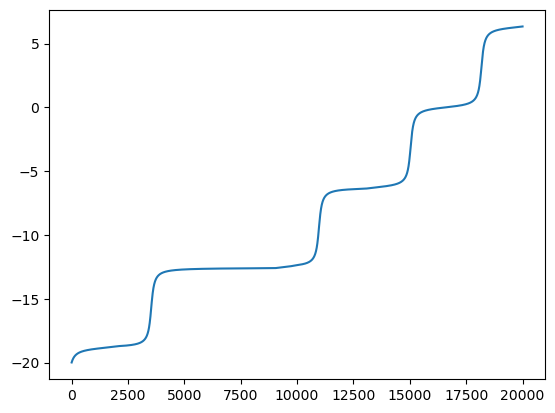

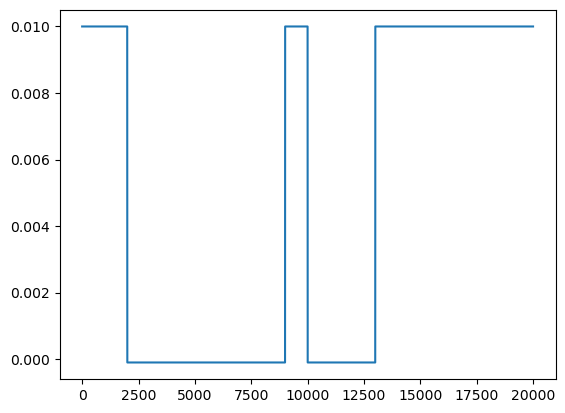

In [223]:
plt.plot(state_tf[:,0])
plt.show()
plt.plot( I_list)
# plt.plot(np.cos(state_tf[:,0]),np.sin(state_tf[:,0]))

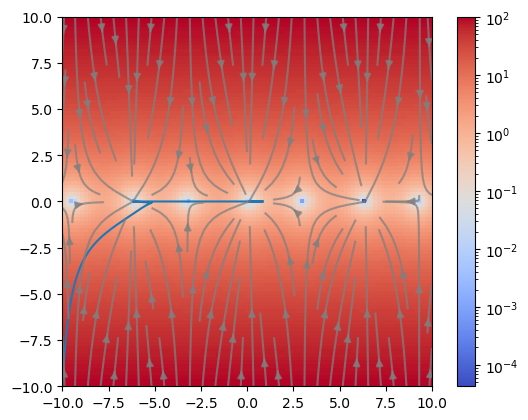

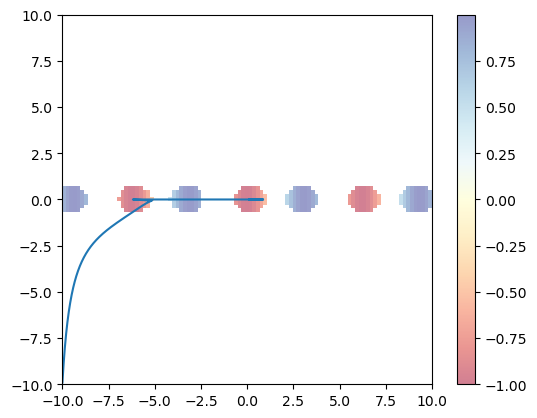

In [92]:
xlim=10
ylim=xlim

xmin=-xlim
xmax=xlim
ymin=-ylim
ymax=ylim

diff=nghost_model
q_thresh=0.6
npxl=101
           
x1=np.linspace(xmin,xmax,npxl)
x2=np.linspace(ymin,ymax,npxl)
grid_ss = np.meshgrid(x1, x2)
Xg,Yg=grid_ss


q_plot=np.zeros((npxl,npxl))
eig_plot=np.zeros((npxl,npxl))
U=np.zeros((len(x1),len(x2)));V=np.zeros((len(x1),len(x2)))

            
for j in range(len(x2)):   
    for i in range(len(x1)):   
        x=np.array([x1[i],x2[j]])
        q_plot[j,i]=q(x,diff)
        if q_plot[j,i]<q_thresh:             
            jacobian = jac_ng(x1[i],x2[j])            
            eigen_values =max(np.real(eig(jacobian)[0]))
            eig_plot[j,i]=eigen_values
        else:
            eig_plot[j,i]=np.nan
        dx=diff(x)
        U[j,i],V[j,i]=dx[0],dx[1]  
    
    dx=diff(x)    
   
%matplotlib inline
cm1 = plt.cm.get_cmap('RdYlBu')
plt.imshow(q_plot,origin='lower',extent=[xmin,xmax,ymin,ymax],cmap='coolwarm',norm=colors.LogNorm())
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(state_tf[:,0],state_tf[:,1])
plt.colorbar()
plt.streamplot(x1,x2,U,V,density=1,color=[0.5,0.5,0.5,0.75])
plt.show()
plt.imshow(eig_plot,cmap=cm1,origin='lower',extent=[xmin,xmax,ymin,ymax],interpolation=None,alpha=0.5)
plt.colorbar()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(state_tf[:,0],state_tf[:,1])
# plt.plot((np.arcsin(r)/kp)*np.ones(len(x2)))
# plt.plot(x1,x2)
plt.show()


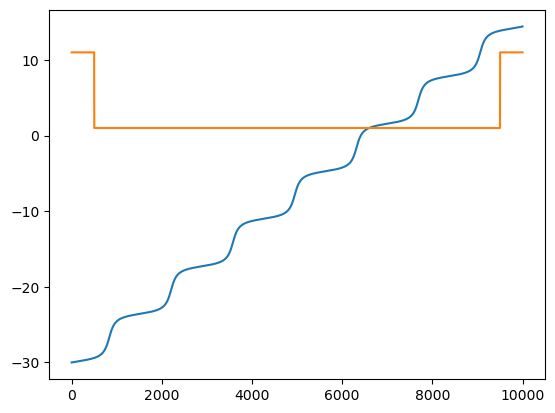

In [124]:
plt.plot(state_tf[:,0])
# plt.show()
plt.plot(I_list)

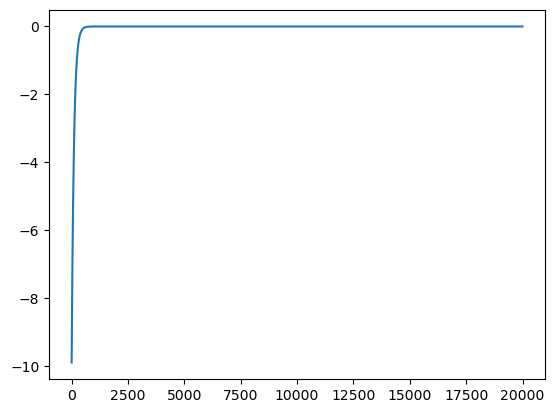

In [55]:
plt.plot(state_tf[:,1])
